# Behavioural analysis

## Preparing the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [3]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-tRelXbv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-tRelXbv\mcEcc_ct-tRelXbv_p0_s1_2016-11-30_1737
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-tRelXbv\mcEcc_ct-tRelXbv_p0_s2_2016-11-30_1743
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-tRelXbv\mcEcc_ct-tRelXbv_p1_s1_2017-01-20_1127
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-tRelXbv\mcEcc_ct-tRelXbv_p1_s2_2017-01-20_1141
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-tRelXbv\mcEcc_ct-tRelXbv_p2_s1_2016-12-05_1505
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-tRelXbv\mcEcc_ct-tRelXbv_p2_s2_2016-12-05_1522
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-tRelXbv\mcEcc_ct-tRelXbv_p3_s1_2016-12-05_1702
C:\Users\Egor\Dropbox\Projects\mc\data\mcEcc_ct-tRelXbv\mcEcc_ct-tRelXbv_p3_s2_2016-12-05_1716
(768, 45)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat',
     

Transforming the data set first.

In [4]:
# Separate columns for the static and dynamic temporal offsets:
ds['tOffStat'] = 0
ds.ix[ds.BvL==0.01,'tOffStat'] = ds.ix[ds.BvL==0.01,'tOffL']
ds.ix[ds.BvR==0.01,'tOffStat'] = ds.ix[ds.BvR==0.01,'tOffR']
ds['tOffDyn'] = 0
ds.ix[ds.BvL==9.6,'tOffDyn'] = ds.ix[ds.BvL==9.6,'tOffL']
ds.ix[ds.BvR==9.6,'tOffDyn'] = ds.ix[ds.BvR==9.6,'tOffR']
# Size of the ring:
ds['ringSzDeg'] = np.round((ds.ringSz+32)/35,1)
#ds['ringSzPL'] = np.round(ds.ringSzDeg/ds.stimSzL,2)
#ds['ringSzPR'] = np.round(ds.ringSzDeg/ds.stimSzL,2)
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

            expName             time  participant  session  trialN  dirL  \
0  mcEcc_ct-tRelXbv  2016-11-30_1737            0        1       1     0   
1  mcEcc_ct-tRelXbv  2016-11-30_1737            0        1       2     0   
2  mcEcc_ct-tRelXbv  2016-11-30_1737            0        1       3     0   
3  mcEcc_ct-tRelXbv  2016-11-30_1737            0        1       4     0   
4  mcEcc_ct-tRelXbv  2016-11-30_1737            0        1       5     0   

   dirR  vL  vR  szL    ...     nf270  pd000     pd090  pd180     pd270  \
0     0   0   0  256    ...         1    0.0  0.000000    0.0  0.009804   
1     0   0   0  256    ...         0    0.0  0.018519    0.0  0.000000   
2     0   0   0  256    ...         0    0.0  0.023810    0.0  0.000000   
3     0   0   0  256    ...         1    0.0  0.000000    0.0  0.012821   
4     0   0   0  256    ...         1    0.0  0.000000    0.0  0.011111   

   qnResp  ringSz  tOffStat  tOffDyn ringSzDeg  
0       0     153       1.0      0.0       

## Visualization

In [5]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum      mean       std  size
0            0   94  0.489583  0.501198   192
1            1  189  0.984375  0.124344   192
2            2   60  0.312500  0.464724   192
3            3   74  0.385417  0.487966   192
Fast (left):
   participant  sum      mean       std  size
0            0    3  0.015625  0.124344   192
1            1    0  0.000000  0.000000   192
2            2   75  0.390625  0.489166   192
3            3   46  0.239583  0.427945   192
Patchy/transparent (up):
   participant  sum      mean       std  size
0            0   95  0.494792  0.501280   192
1            1    3  0.015625  0.124344   192
2            2   15  0.078125  0.269070   192
3            3   59  0.307292  0.462578   192


### Instances of slow/fast/patchy center/whole-field responses

#### As a function of the static temporal offset

(-0.1, 1.1)

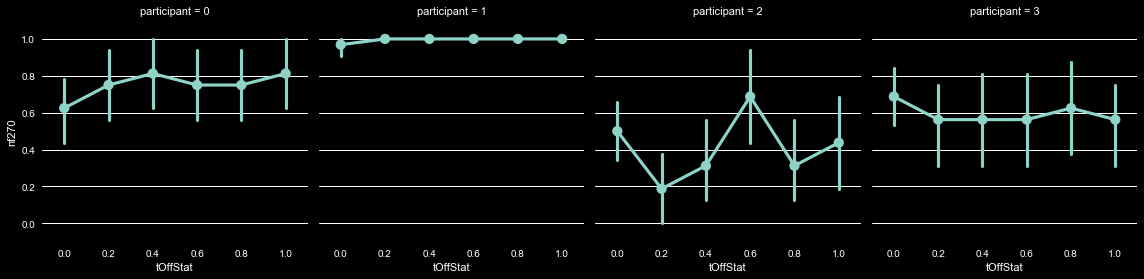

In [6]:
g = sns.factorplot(x='tOffStat', y='nf270', col='participant',
                   data=ds[(ds.tOffDyn==0)], ci=95, dodge=.0)
plt.ylim(-0.1,1.1)

It seems that there's only a marginal increase, with a quick saturation, of the insances of the temporal offset in the onset of the static stimulus. In other words, presenting a static stimulus later than a dynamic one results in no discernable change in the occurrence of the center-surround phenomenon.

(-0.1, 1.1)

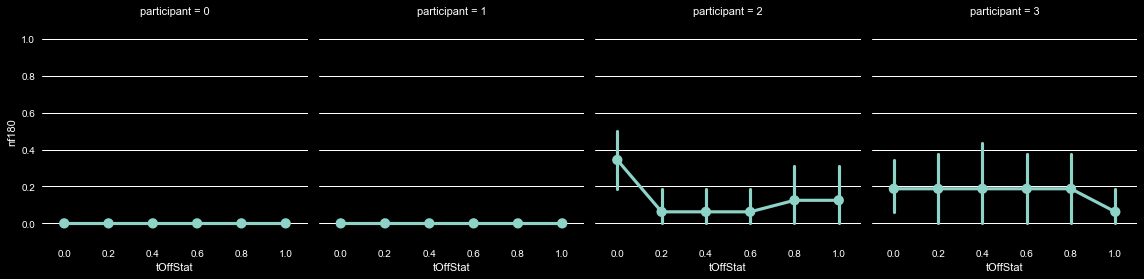

In [7]:
g = sns.factorplot(x='tOffStat', y='nf180', col='participant',
                   data=ds[(ds.tOffDyn==0)], ci=95, dodge=.0)
plt.ylim(-0.1,1.1)

There are no instances when the whole field appeared fast.

(-0.1, 1.1)

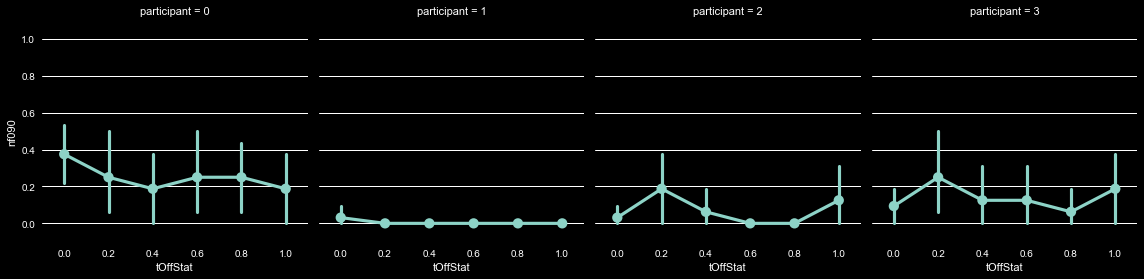

In [8]:
g = sns.factorplot(x='tOffStat', y='nf090', col='participant',
                   data=ds[(ds.tOffDyn==0)], ci=95, dodge=.0)
plt.ylim(-0.1,1.1)

In all instances when the slow-center was not observed, patchy rivalry occurred. This occurred uniformly for all tested offsets of the static stimulus.

In [20]:
ss = ds[ds.tOffDyn==0]
summary = ss.groupby(['participant','tOffStat'], as_index=False)['nf270','nf180','nf090'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['tOffStat'] = summary.tOffStat
sumPtnts['static'] = summary.nf270['mean']
sumPtnts['dynamic'] = summary.nf180['mean']
sumPtnts['patchy'] = summary.nf090['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','tOffStat'])
sumTdyn = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumTdyn.head(5)

,participant,tOffStat,response,proportion trials
0,0,0.0,static,0.6250
1,0,0.2,static,0.7500
2,0,0.4,static,0.8125
3,0,0.6,static,0.7500
4,0,0.8,static,0.7500


(-0.1, 1.1)

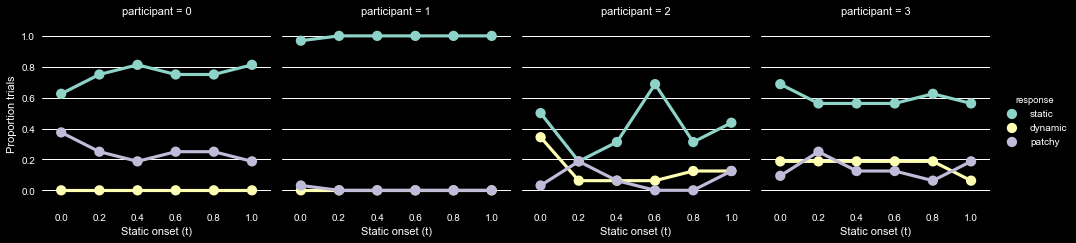

In [21]:
g = sns.factorplot(x='tOffStat', y='proportion trials', hue='response', col='participant', data=sumTdyn, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('Static onset (t)','Proportion trials')
plt.ylim(-0.1,1.1)

#### As a function of the dynamic stimulus offset

(-0.1, 1.1)

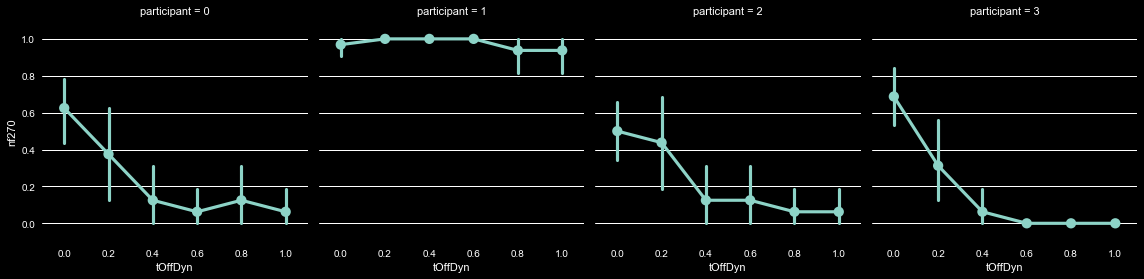

In [9]:
g = sns.factorplot(x='tOffDyn', y='nf270', col='participant',
                   data=ds[(ds.tOffStat==0)], ci=95, dodge=.0)
plt.ylim(-0.1,1.1)

There is a very clear drop in the number of the center-surround phenomenon as a fn of the temporal offset of the dynamic stimulus: the later the dynamic pattern is introduced, the less likely the center-surround is to be perceived.

(-0.1, 1.1)

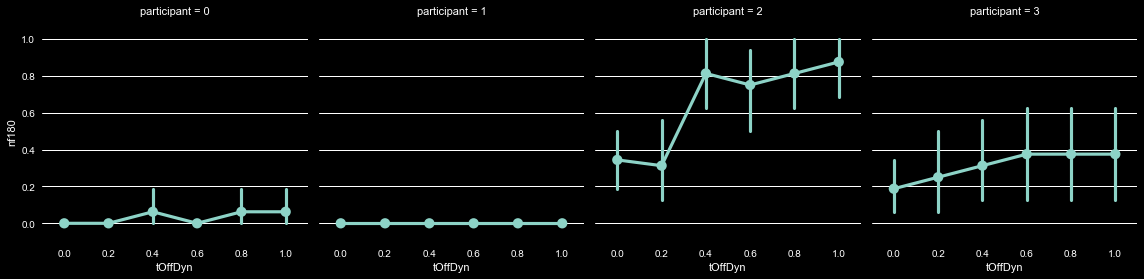

In [10]:
g = sns.factorplot(x='tOffDyn', y='nf180', col='participant',
                   data=ds[(ds.tOffStat==0)], ci=95, dodge=.0)
plt.ylim(-0.1,1.1)

Very few instances when the whole field appeared fast.

(-0.1, 1.1)

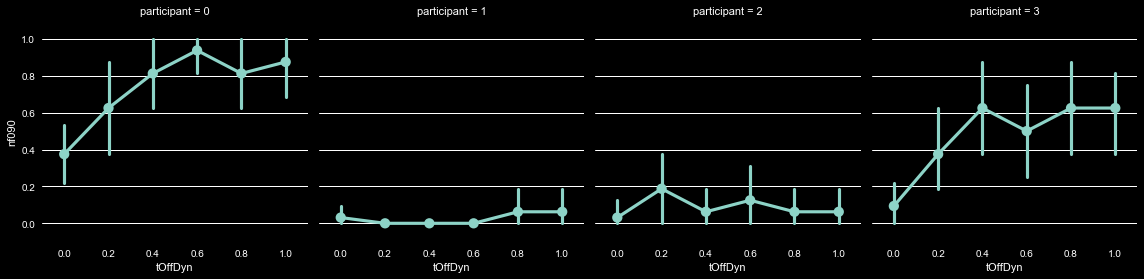

In [11]:
g = sns.factorplot(x='tOffDyn', y='nf090', col='participant',
                   data=ds[(ds.tOffStat==0)], ci=95, dodge=.0)
plt.ylim(-0.1,1.1)

Instead, when the dynamic stimulus was introduced later than 500ms into the trial, patchy rivalry was more likely to occur.

In [22]:
ss = ds[ds.tOffStat==0]
summary = ss.groupby(['participant','tOffDyn'], as_index=False)['nf270','nf180','nf090'].agg([np.mean]).reset_index()
sumPtnts = pd.DataFrame()
sumPtnts['participant'] = summary.participant
sumPtnts['tOffDyn'] = summary.tOffDyn
sumPtnts['static'] = summary.nf270['mean']
sumPtnts['dynamic'] = summary.nf180['mean']
sumPtnts['patchy'] = summary.nf090['mean']
sumPtntsMelted = pd.melt(sumPtnts, id_vars=['participant','tOffDyn'])
sumTdyn = sumPtntsMelted.rename(columns={'variable': 'response', 'value': 'proportion trials'})
sumTdyn.head(5)

,participant,tOffDyn,response,proportion trials
0,0,0.0,static,0.6250
1,0,0.2,static,0.3750
2,0,0.4,static,0.1250
3,0,0.6,static,0.0625
4,0,0.8,static,0.1250


(-0.1, 1.1)

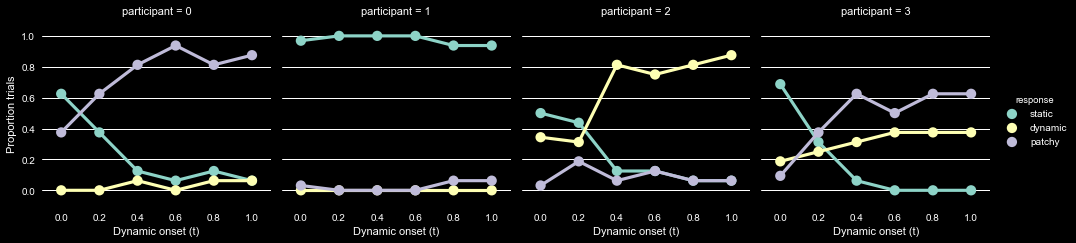

In [23]:
g = sns.factorplot(x='tOffDyn', y='proportion trials', hue='response', col='participant', data=sumTdyn, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('Dynamic onset (t)','Proportion trials')
plt.ylim(-0.1,1.1)

### Size of the ring

#### As a function of the static stimulus offset

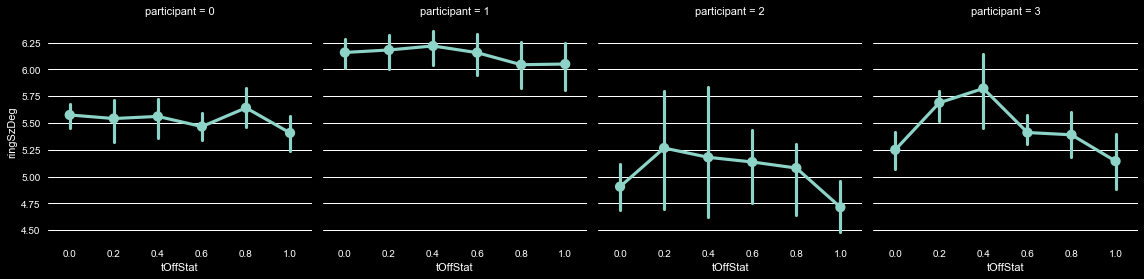

In [12]:
g = sns.factorplot(x='tOffStat', y='ringSzDeg', col='participant', 
                   data=ds[(ds.tOffDyn==0) & (ds.nf270==1)], ci=95, dodge=.0)

The size of the ring does not seem to be affected systmatically by the onset of the static stimulus in the center-surround trials.

There are no instances when the whole field appeared fast.

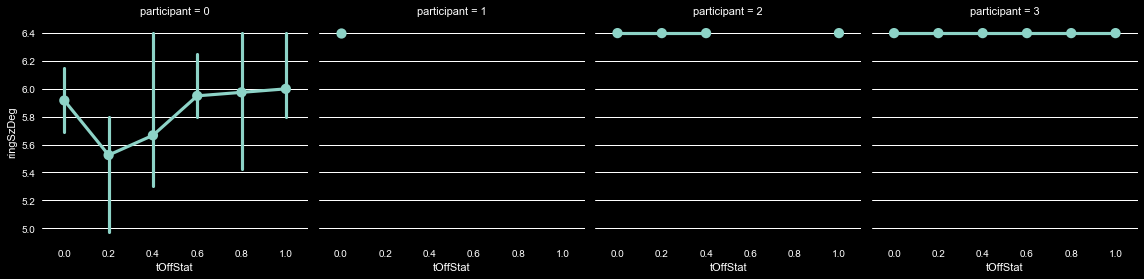

In [13]:
g = sns.factorplot(x='tOffStat', y='ringSzDeg', col='participant', 
                   data=ds[(ds.tOffDyn==0) & (ds.nf090==1)], ci=95, dodge=.0)

For patchy trials, the size of the ring fluctuated only a little as a function of the static stimulus onset.

#### As a function of the dynamic stimulus size

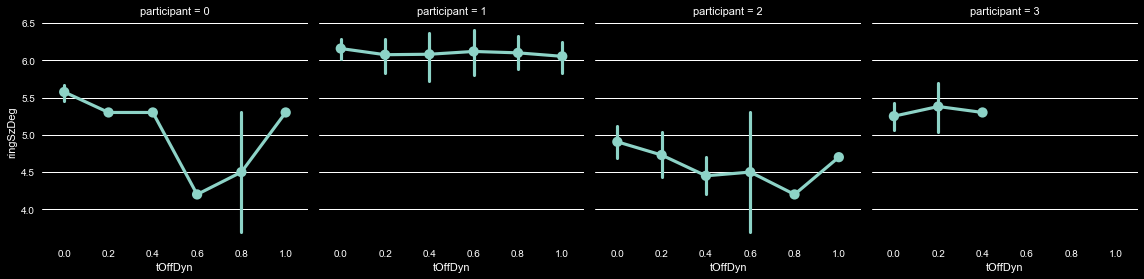

In [14]:
g = sns.factorplot(x='tOffDyn', y='ringSzDeg', col='participant',
                   data=ds[(ds.tOffStat==0) & (ds.nf270==1)], ci=95, dodge=.0)

There does seem to be quite a discernable drop in the size of the ring (1-1.5 deg) when the dynamic stimulus is introduced with 0.5 to 0.8s delay compared to the static stimulus.

Only one instances of the fast field alone.

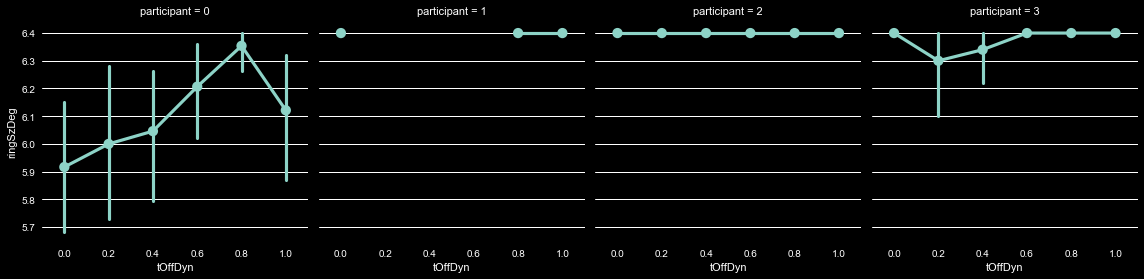

In [15]:
g = sns.factorplot(x='tOffDyn', y='ringSzDeg', col='participant', 
                   data=ds[(ds.tOffStat==0) & (ds.nf090==1)], ci=95, dodge=.0)

For patchy trials, the size of the ring instead increased as a function of the dynamic stimulus onset, peaking at .8s.